# Understanding Features

## corners as Featurs:
Cornes are identified when shifiting a window in any direction over that point gives a large chanfe in intensity. To find corners there are two methodes.
![](images/feature_simple.png)


### 1. Harris Corner Method: 
We have to maximize this function E(u,v) for corner detection
![](images/Harris_function.png)
where
![](images/Harris_function2.png)
here, $I_x$ and $I_y$ are image derivatives in x and y directions respectively and (u,v) are the displacement in all directions. So the values of the eigen values of the Matrix M decide whether a region is corner, edge or flat.

![](images/harris_region.jpg)
ref: http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

**cv2.cornerHarris**(input image, block size, ksize, k)
- Input image - should be grayscale and float32 type.
- blockSize - the size of neighborhood considered for corner detection
- ksize - aperture parameter of Sobel derivative used.
- k - harris detector free parameter in the equation
- **Output** – array of corner locations (x,y)

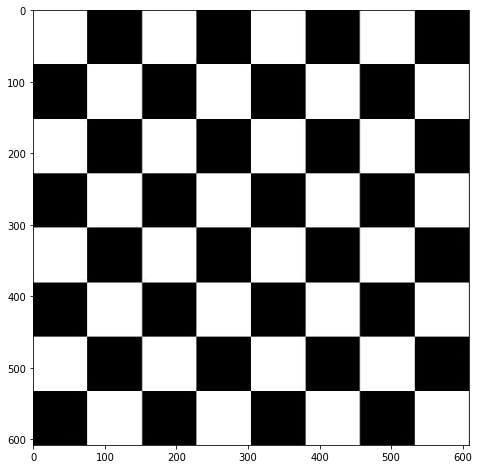

In [3]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# Load input image and convert to grayscale
image = cv2.imread('images/chess.jpg')
plt.figure(figsize= (12,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

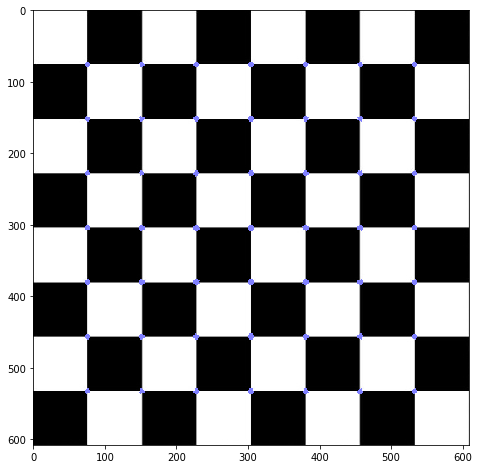

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# The cornerHarris function requires the array datatype to be float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

plt.figure(figsize= (12,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

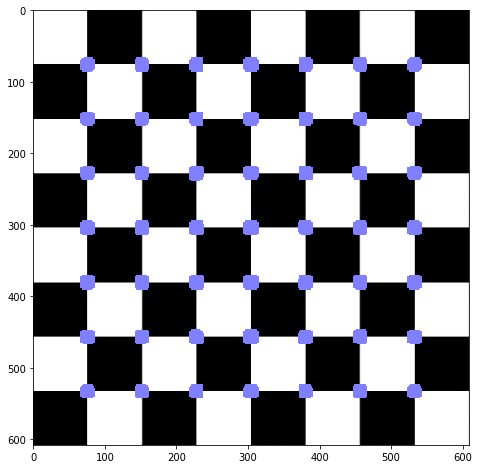

In [6]:
#We use dilation of the corner points to enlarge them
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

plt.figure(figsize= (12,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### 2. Good Features to Track
OpenCV has a function, **cv2.goodFeaturesToTrack( )**. It finds N strongest corners in the image by Shi-Tomasi method (or Harris Corner Detection, if you specify it). As usual, image should be a grayscale image. Then you specify number of corners you want to find. Then you specify the quality level, which is a value between 0-1, which denotes the minimum quality of corner below which everyone is rejected. Then we provide the minimum euclidean distance between corners detected.
ref: http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html

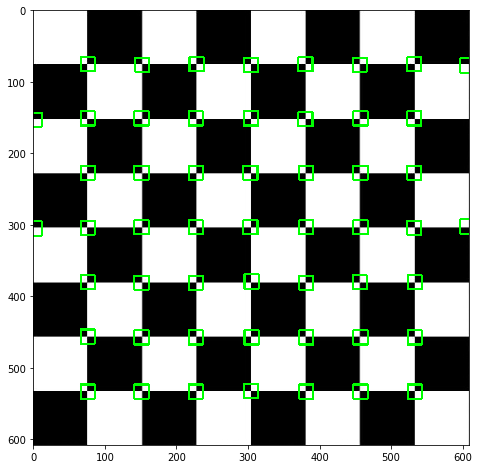

In [11]:
img = cv2.imread('images/chess.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# We specific the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 15)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img,(x-10,y-10),(x+10,y+10),(0,255,0), 2)
    
plt.figure(figsize= (12,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Problem with Corners as Features:
Corner matching in images is **tolerant** of:
* Rotations
* Translations
* Slight Photometric Changes e.g. Brightness
 
But Corner matching in images is **intolerant** of:
* Large Changes in intesity or Photometric Changes
* Scaling for example if we enlarge an image then the window detects a an edge instead of angle.